In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
er_gossip = pd.read_csv("data/ER-p=0.050000_gossip-N=1000-beta=0.200000-gamma=0.200000.csv")
er_gossip.columns = ['step', 'sus', 'inf', 'res']

group = er_gossip.groupby('step')

sus_mean = group.agg({'sus': ['mean']})
inf_mean = group.agg({'inf': ['mean']})
res_mean = group.agg({'res': ['mean']})

check = group.get_group(12)
print(check)

number_of_sim_with_that_step = group.size()
print(number_of_sim_with_that_step)

      step  sus  inf  res
11      12  792  195   13
55      12  792  195   13
99      12  792  195   13
143     12  792  195   13
187     12  792  195   13
...    ...  ...  ...  ...
4378    12  803  189    8
4421    12  803  189    8
4464    12  803  189    8
4507    12  803  189    8
4550    12  803  189    8

[100 rows x 4 columns]
step
0      99
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
23    100
24    100
25    100
26    100
27    100
28    100
29    100
30    100
31    100
32    100
33    100
34    100
35    100
36    100
37    100
38    100
39     88
40     88
41     88
42     88
43     69
44     49
45     49
46     39
47     39
48     29
49     29
50      9
51      9
52      9
dtype: int64


In [74]:
max_step = pd.Series(ba_gossip_1.max()).values[0]+1
print(max_step)
steps = np.array(range(0, max_step))

53


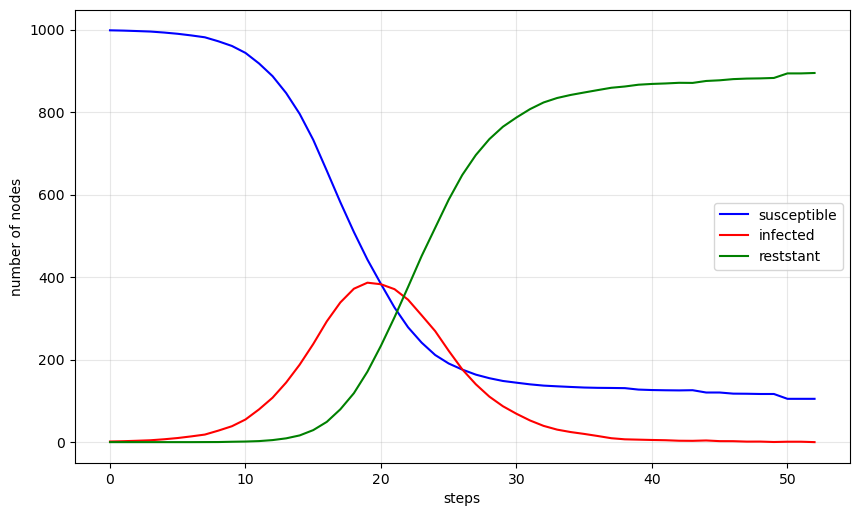

In [75]:
fig, (ax) = plt.subplots(nrows=1, figsize=(10,6), dpi=100)
ax.plot(steps, sus_mean, color='blue', label='susceptible')
ax.plot(steps, inf_mean, color='red', label='infected')
ax.plot(steps, res_mean, color='green', label='reststant')
ax.legend()

ax.grid(alpha=0.3)
ax.set_xlabel('steps')
ax.set_ylabel('number of nodes')
#plt.savefig('er_gossip_1.png', transparent=True, bbox_inches='tight')
plt.show()